In [1]:
%matplotlib inline


# Realtime Functionality
This sample script shows how to use Tropycal to retrieve and plot real time tropical cyclones and potential formation. As this script was written on 24 September 2022, the data below is valid for the time this script was written.


In [2]:
from tropycal import realtime

## Reading In Realtime Dataset

Let's start with the Realtime dataset by loading it into memory. By default, this reads in Best Track data from the National Hurricane Center (NHC) and filters for all active tropical cyclones and invests over the last 18 hours.

The default is to not include global storms in the Joint Typhoon Warning Center (JTWC)'s area of responsibility. To read in invests and storms within JTWC's domain, add a ``jtwc=True`` argument, followed by a ``jtwc_source`` argument which can be either "jtwc", "noaa", or "ucar". Read through the documentation to see the limits and pros/cons of each method.

To keep this demonstration simple, we'll solely focus on the North Atlantic basin.



In [3]:
realtime_obj = realtime.Realtime()

--> Starting to read in current storm data
--> Completed reading in current storm data (35.02 seconds)


## View Current Activity

To quickly view the content of the Realtime object, we can simply print it:



In [4]:
realtime_obj

<tropycal.realtime.Realtime>
Dataset Summary:
    Numbers of active storms: 4
    Time Updated: 2003 UTC 02 October 2024

Active Storms:
    AL122024
    EP112024

Active Invests:
    AL912024
    EP972024

In [5]:
realtime_obj

<tropycal.realtime.Realtime>
Dataset Summary:
    Numbers of active storms: 4
    Time Updated: 2003 UTC 02 October 2024

Active Storms:
    AL122024
    EP112024

Active Invests:
    AL912024
    EP972024

Alternatively, we can also list all active storms, along with an optional filter by basin.



In [6]:
realtime_obj.list_active_storms(basin='all')

['AL122024', 'AL912024', 'EP112024', 'EP972024']

A new functionality with Tropycal v0.4 is to plot a summary of all ongoing activity, whether globally or by basin. This function can be highly customized, with more details in the documentation.

At the time this script was written, Ian, Gaston and Hermine are active in the Atlantic Ocean, with invest 99L (30% of development) active as well.

The domain option for this plot is set to 'all' by default, plotting the full globe. This can also be a basin (e.g., 'north_atlantic', 'east_pacific'), or a custom domain, as we'll plot below.



Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but w

<GeoAxes: title={'left': 'Summary & NHC 7-Day Formation Outlook', 'right': 'Valid: 14 UTC 02 Oct 2024'}>

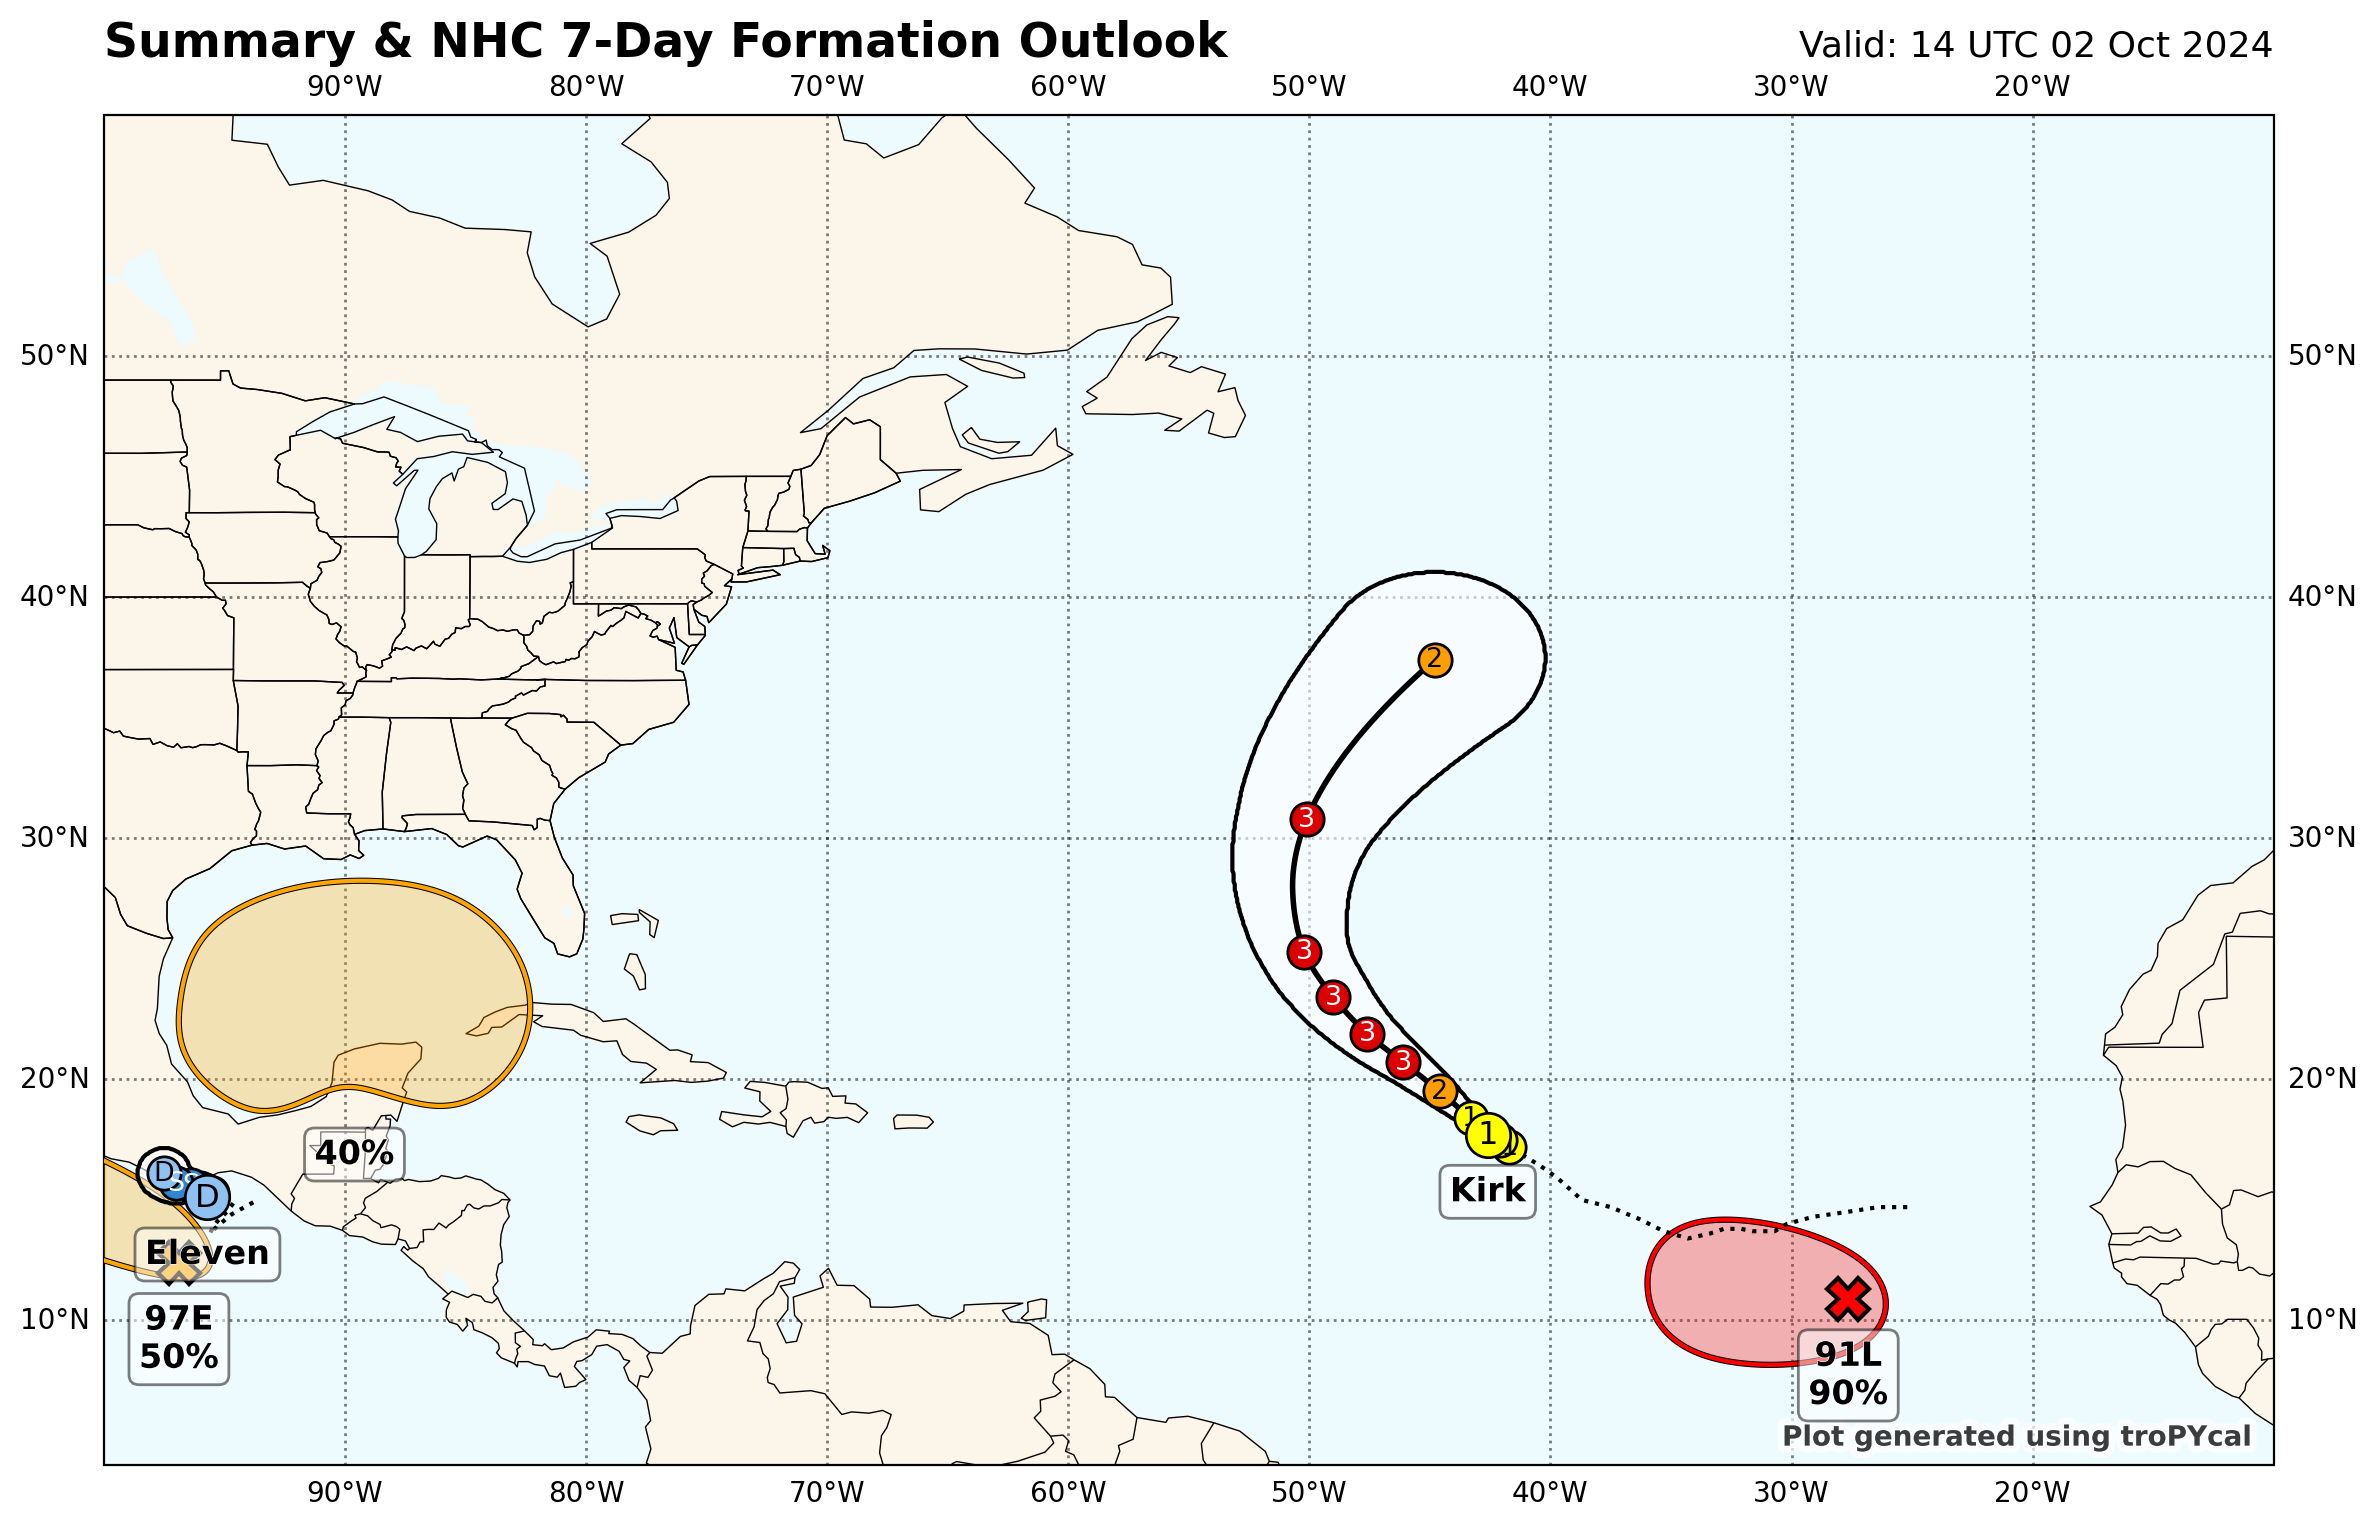

In [7]:
realtime_obj.plot_summary(domain={'w':-100,'e':-10,'s':4,'n':60})

Let's look at a few ways to customize this plot. There are four properties available to customize the plot, detailed more thoroughly in the documentation:

- ``two_prop`` - Properties to customize NHC Tropical Weather Outlook (TWO) plotting
- ``invest_prop`` - Properties to customize invest plotting
- ``storm_prop`` - Properties to customize tropical cyclone plotting
- ``cone_prop`` - Properties to customize forecast cone/track plotting

The above plot includes the NHC TWO by default. Plotting the TWO overrides any invests that have a TWO associated with them (invests that are outside of NHC's area of responsibility or don't have a TWO still appear). We can pass the ``'plot':False`` argument to any property dict, which in doing so removes that element from the summary map. Let's test this out by removing the TWO and cone of uncertainty from the plot:



Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but w

<GeoAxes: title={'left': 'Summary & NHC 7-Day Formation Outlook', 'right': 'Valid: 14 UTC 02 Oct 2024'}>

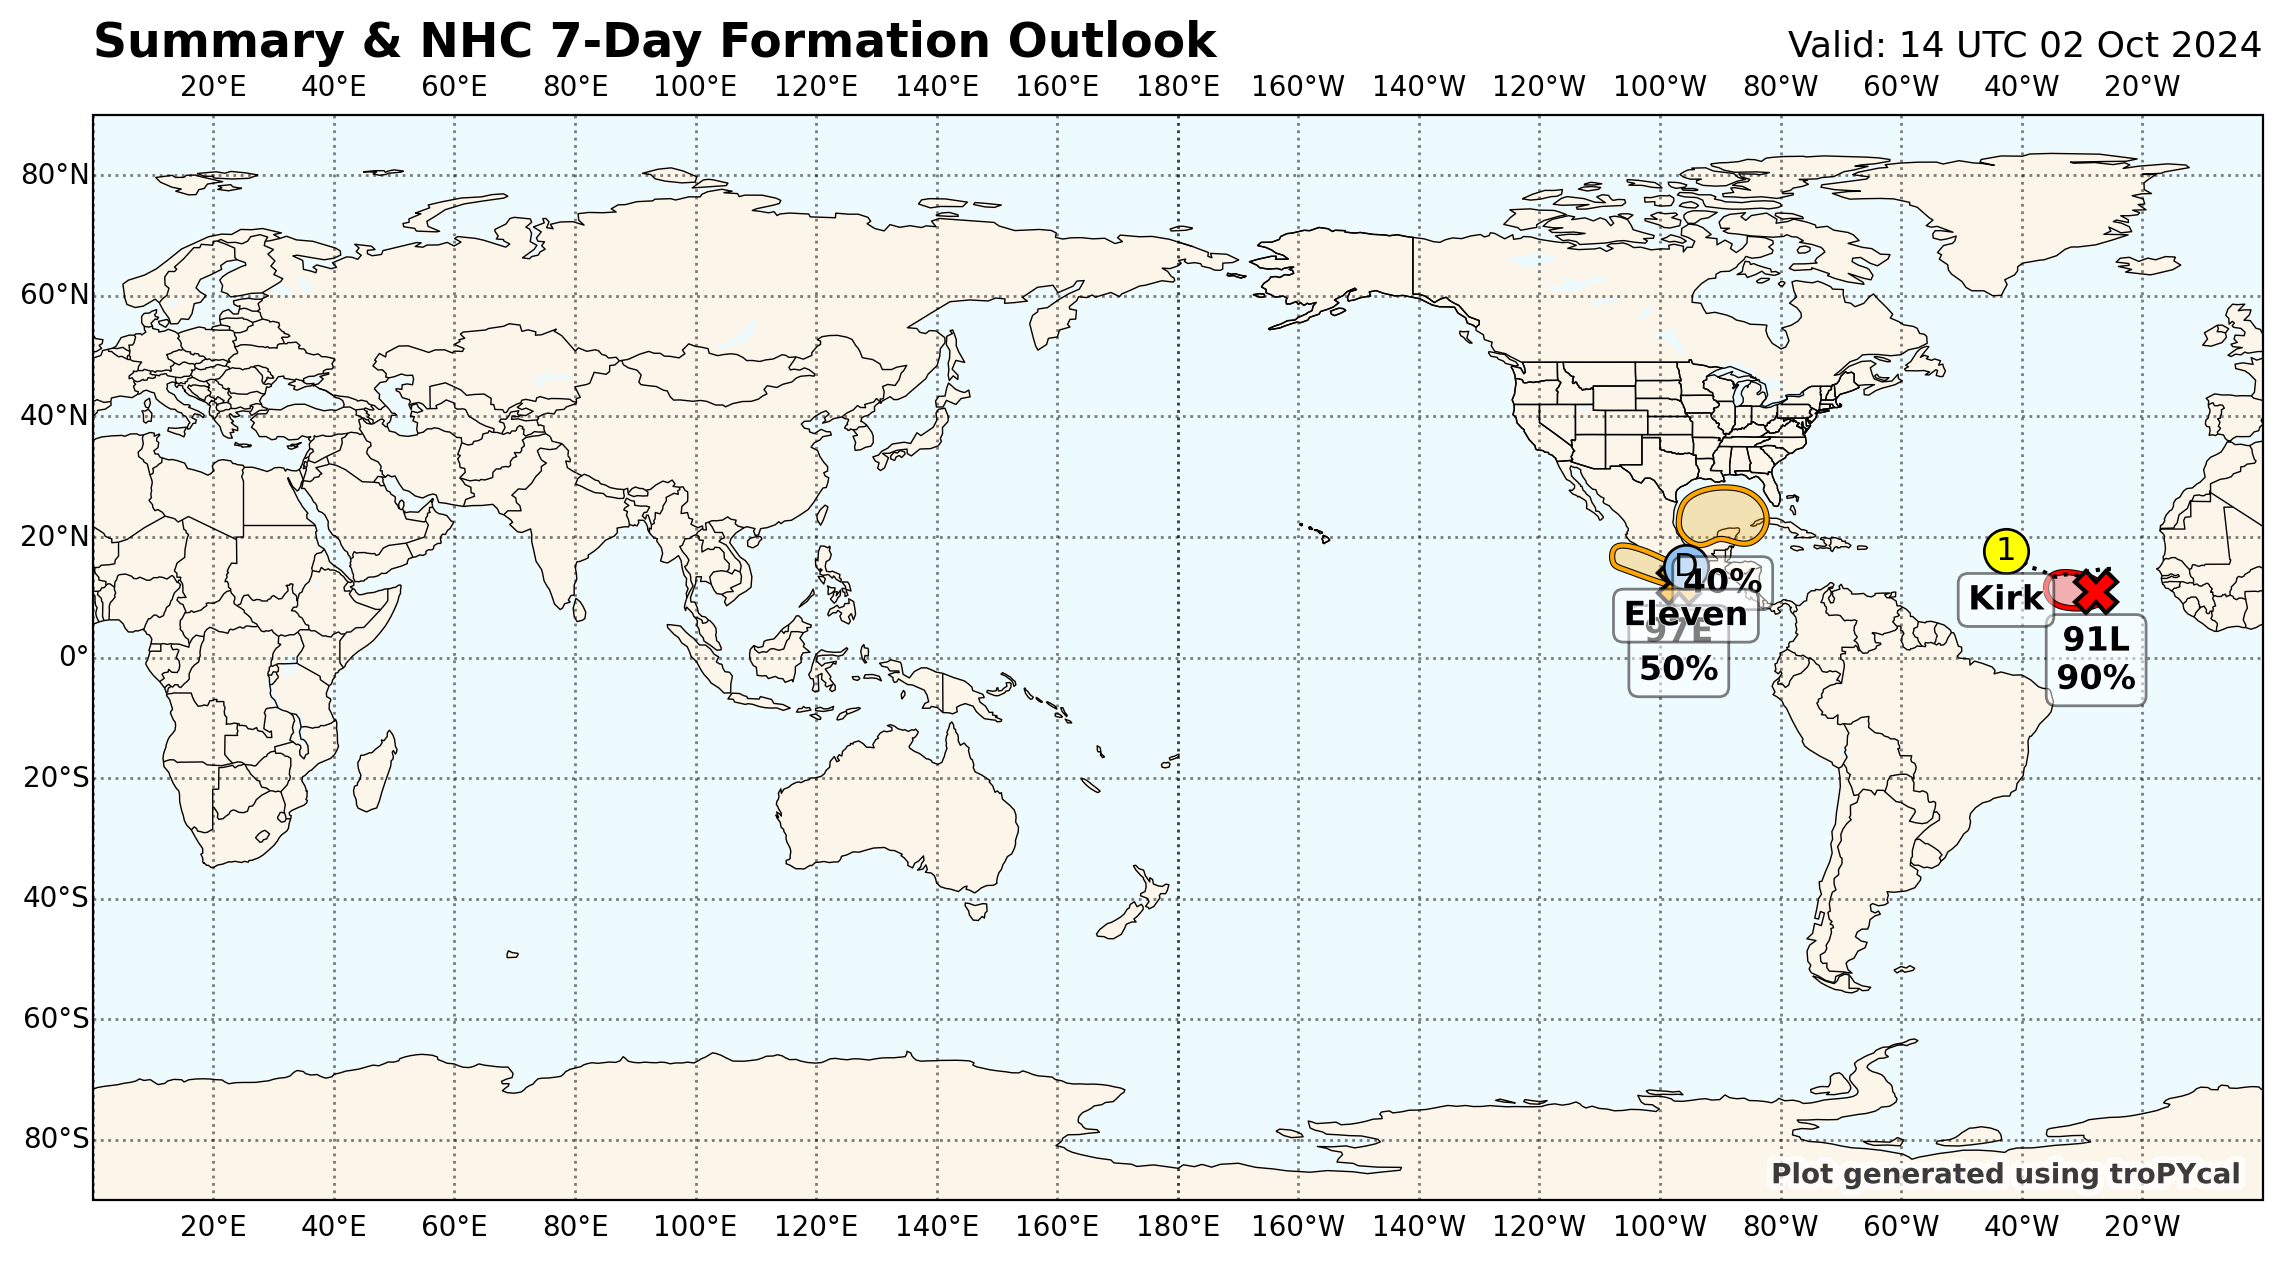

In [13]:
realtime_obj.plot_summary(domain='all', two_prop={'plot':True}, cone_prop={'plot':False})

## Realtime Storms
To retrieve a storm from a Realtime object, simply use its ``get_storm()`` method and provide an ID as listed in ``list_active_storms()``:



In [9]:
storms = ["AL092024","AL102024","EP102024"]

In [22]:
storm = realtime_obj.get_storm("EP112024")

This now returns a RealtimeStorm object. RealtimeStorm objects inherit the same functionality as Storm objects, but have additional functions unique to realtime storms. Additionally, as these can also be valid for invests, certain functionality that is only available for tropical cyclones (e.g., NHC forecasts or discussions) is unavailable for invests.

Let's view what this RealtimeStorm object contains:



In [23]:
storm

<tropycal.realtime.RealtimeStorm>
Storm Summary:
    Maximum Wind:      30 knots
    Minimum Pressure:  1005 hPa
    Start Time:        0000 UTC 02 October 2024
    End Time:          1200 UTC 02 October 2024

Variables:
    time        (datetime) [2024-09-30 00:00:00 .... 2024-10-02 12:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [DB .... TD]
    lat         (float64) [14.9 .... 15.1]
    lon         (float64) [-93.8 .... -95.7]
    vmax        (int32) [20 .... 30]
    mslp        (int32) [1008 .... 1005]
    wmo_basin   (str) [east_pacific .... east_pacific]

More Information:
    id:              EP112024
    operational_id:  EP112024
    name:            ELEVEN
    year:            2024
    season:          2024
    basin:           east_pacific
    source_info:     NHC Hurricane Database
    invest:          False
    source_method:   NHC's Automated Tropical Cyclone Forecasting System (ATCF)
    source_url:      https://ftp.nhc.no

A quick and easy way to check if a storm is an invest is by checking its ``invest`` attribute. This will let you know if you can use the full set of functionality available for tropical cyclones or not.



In [24]:
storm.invest

False

The next few blocks will overview functions unique to RealtimeStorm objects. We can easily retrieve the latest available forecast dictionary from NHC or JTWC, depending on what area of responsibility the storm is in.

This function also calculates the forecast Accumulated Cyclone Energy (ACE), derived by combining its observed ACE through the current time plus the forecast ACE using linearly interpolated forecast sustained wind.



In [25]:
storm.get_forecast_realtime()

{'init': datetime.datetime(2024, 10, 2, 6, 0),
 'fhr': [0, 3, 12, 24, 36, 48],
 'lat': [15.3, 15.4, 15.5, 15.6, 15.7, 16.1],
 'lon': [-95.5, -95.8, -96.0, -96.4, -97.0, -97.5],
 'vmax': [30, 30, 35, 40, 40, 30],
 'mslp': [nan, 1005, nan, nan, nan, nan],
 'type': ['TD', 'TD', 'TS', 'TS', 'TS', 'TD'],
 'windrad': [{34: [0, 0, 0, 0]},
  {34: [0, 0, 0, 0]},
  {34: [30, 30, 0, 30]},
  {34: [30, 40, 30, 20]},
  {34: [30, 40, 30, 20]},
  {34: [0, 0, 0, 0]}],
 'cumulative_ace': [0.0, 0.1, 0.4, 0.7, 0.9],
 'cumulative_ace_fhr': [0, 12, 24, 36, 48]}

We can also plot it using the ``plot_forecast_realtime()`` method:



<GeoAxes: title={'left': 'Tropical Depression ELEVEN', 'right': 'Current Intensity: 35 mph • 1005 hPa\nNHC Issued: 0900 UTC 02 Oct 2024'}>

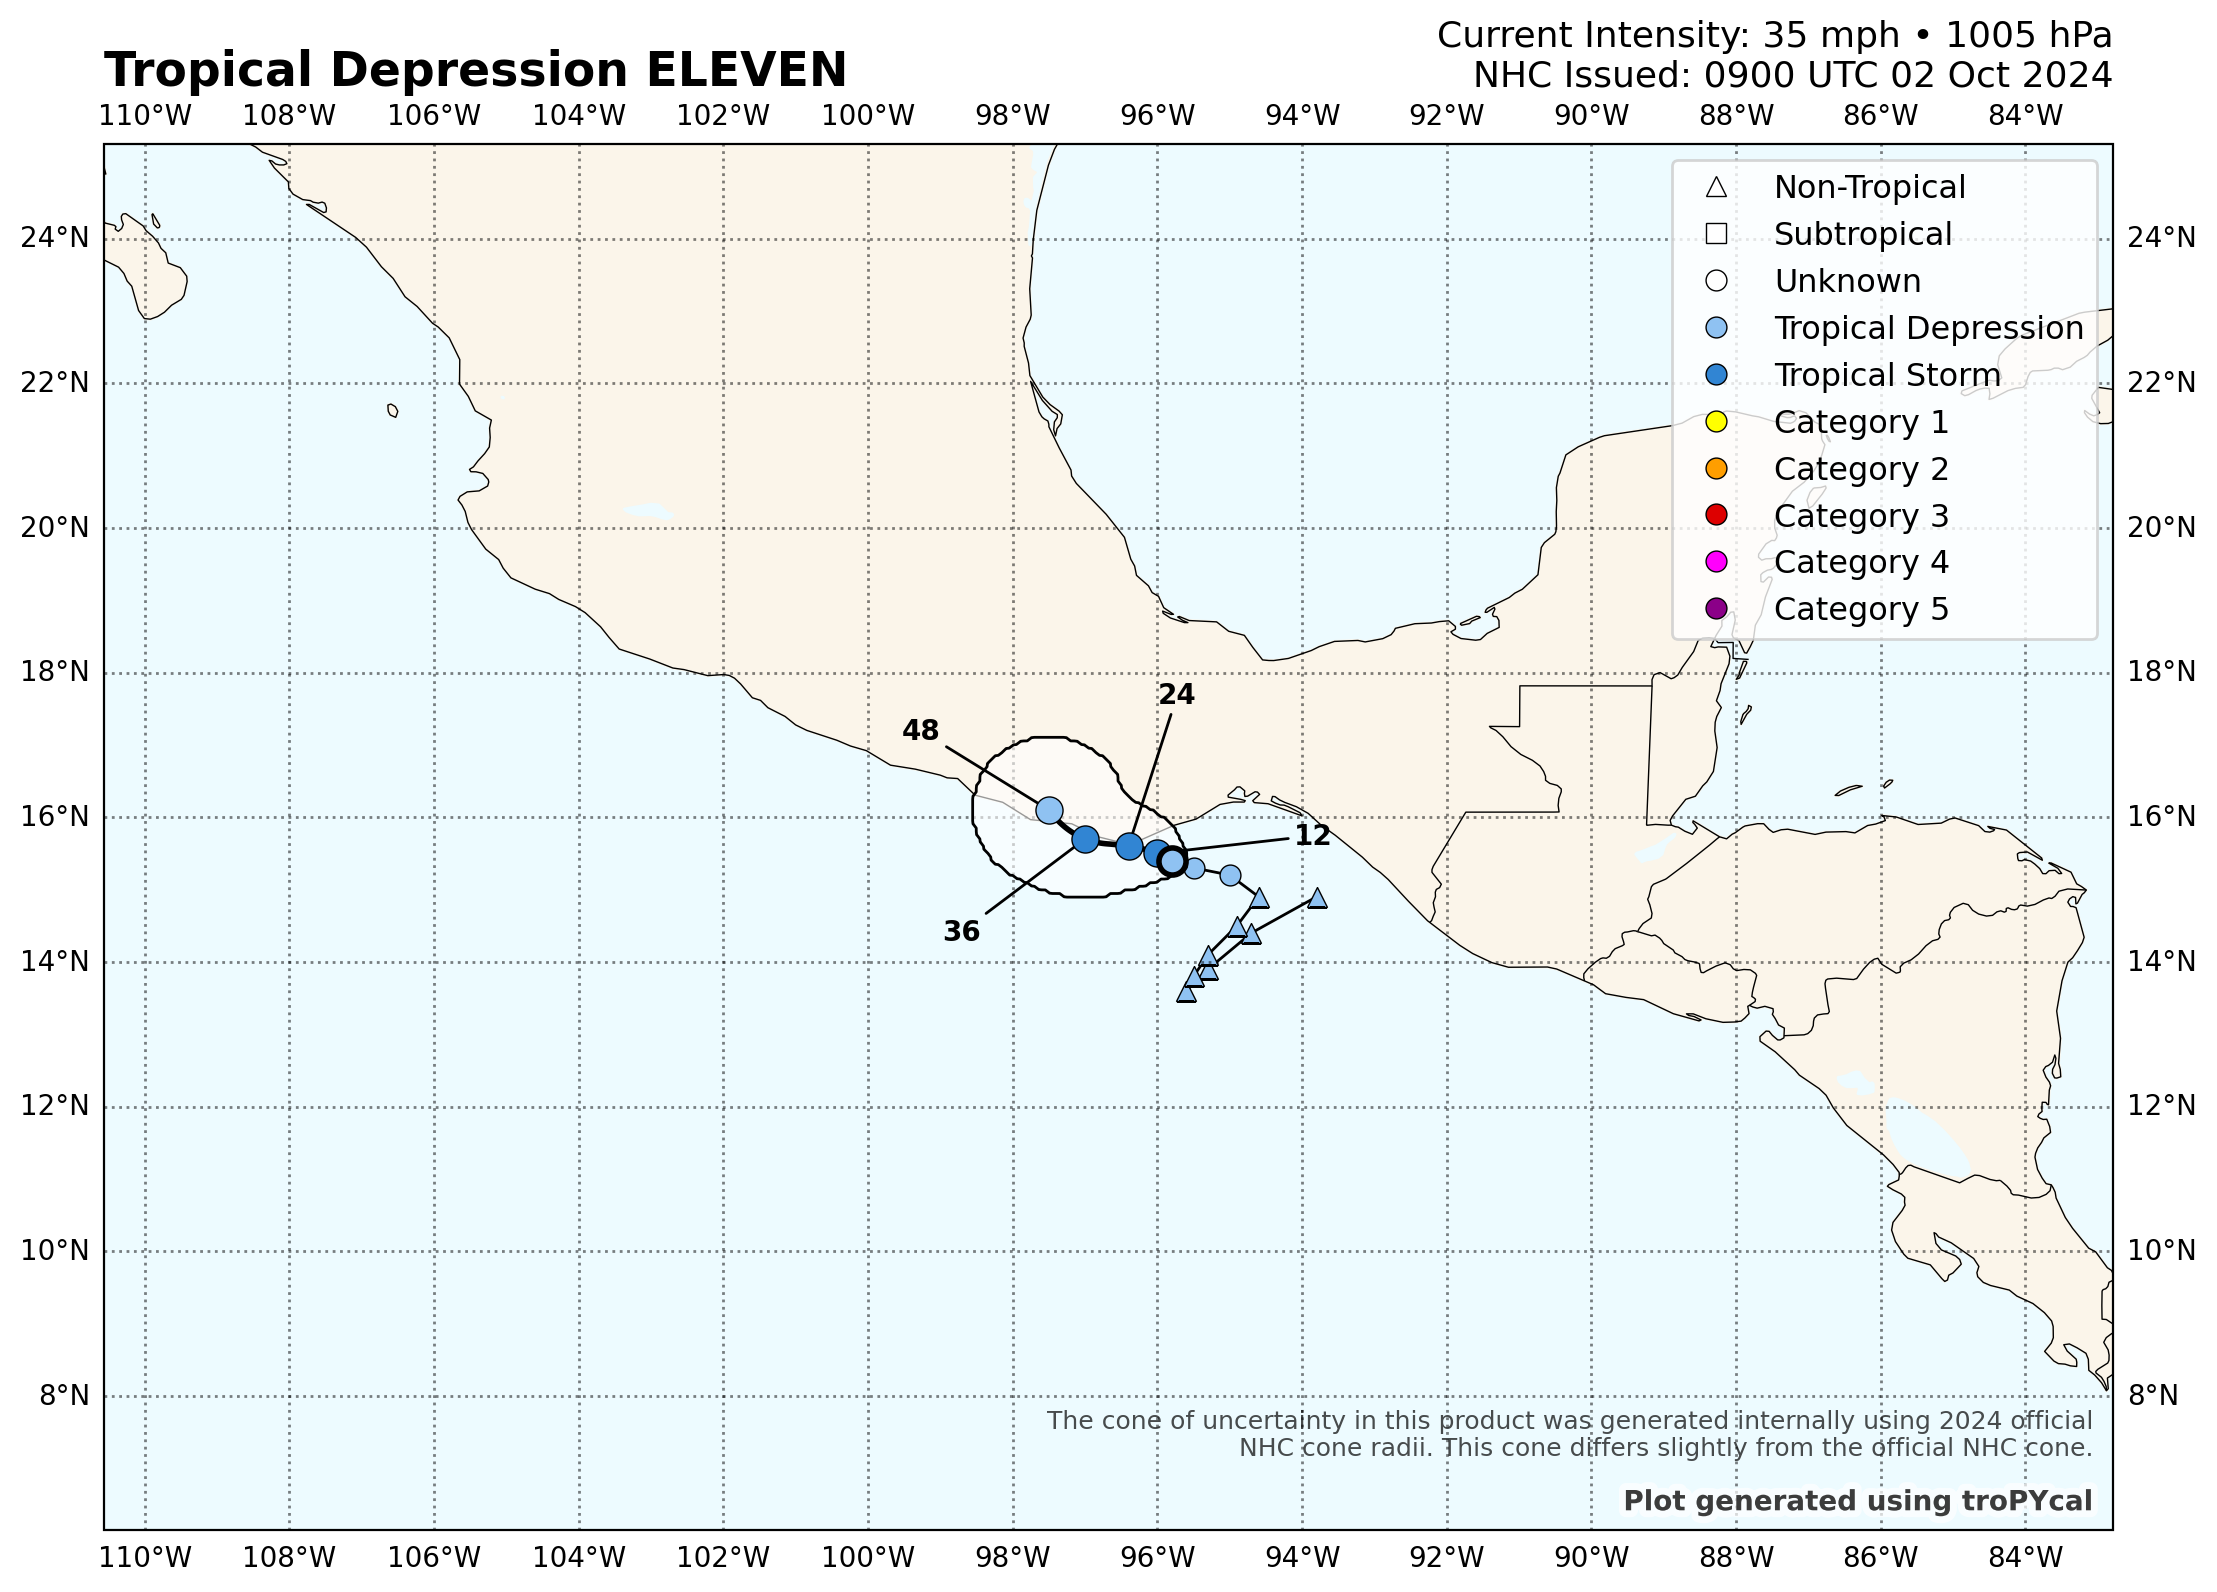

In [26]:
storm.plot_forecast_realtime()

Storm forecast discussions can also be retrieved for storms in NHC's area of responsibility, or the Prognostic Reasoning product for JTWC's area of responsibility.



In [27]:
storm.get_discussion_realtime()

{'id': 4,
 'time_issued': datetime.datetime(2024, 10, 2, 15, 0),
 'text': 'ZCZC MIATCDEP1 ALL\nTTAA00 KNHC DDHHMM\n \nTropical Depression Eleven-E Discussion Number   4\nNWS National Hurricane Center Miami FL       EP112024\n900 AM CST Wed Oct 02 2024\n \nFirst light visible imagery and a GMI microwave overpass during the \nnight show that the center of Tropical Depression Eleven-E is again \na little to the southwest of the previous track.  While the system \nis part of a large area of convection, the convection is generally \npoorly organized, and there has been little change in the various \nsatellite intensity estimates since the last advisory.  Based on \nthis, the initial intensity remains 30 kt.\n\nThe track forecast is of low confidence. Satellite imagery and model \nanalyses indicate that the depression is currently absorbing or \nmerging with the vorticity of the EP97 disturbance, and this has \nresulted in the system center moving slowly southwestward during the \npast 6-12 

Lastly, RealtimeStorms also provide the latest available information using the ``get_realtime_info()`` method.

The default argument is ``source='all'``, which returns the latest available data whether from Best Track or NHC Public Advisories. Other possible values are "public_advisory", which only returns the latest public advisory, or "best_track", which only returns the latest best track data.



In [28]:
storm.get_realtime_info()

{'source': 'NHC Public Advisory',
 'advisory_number': '4',
 'time_utc': datetime.datetime(2024, 10, 2, 15, 0),
 'type': 'Tropical Depression',
 'name': 'Eleven-E',
 'lat': 14.9,
 'lon': -95.8,
 'wind_mph': 35,
 'wind_kph': 55,
 'wind_kt': 30,
 'mslp': 1005,
 'category': -1,
 'motion_direction': 'SW',
 'motion_direction_degrees': 225,
 'motion_mph': 2,
 'motion_kph': 4,
 'motion_kt': 2}

## Realtime Invests
Invests are essentially RealtimeStorm objects, but without much of the functionality that comes with tropical cyclones (e.g., official forecast track, forecast discussion, etc.). Let's test this out for invest 99L:



In [30]:
invest = realtime_obj.get_storm('AL102024')
invest

RuntimeError: Requested storm ID is not contained in this object.

As we can see above, the ``invest`` attribute of this object is True. For invests in NHC's area of responsibility, we can retrieve NHC's probability of formation which is matched to the closest TWO to the invest within a certain distance of the invest.



In [29]:
invest.get_realtime_formation_prob()

NameError: name 'invest' is not defined

GeoJSON file created for storm 'KIRK': C:/Downloads/KIRK_forecast.geojson


RuntimeError: Error: NHC does not issue advisories for invests that have not been designated as Potential Tropical Cyclones.

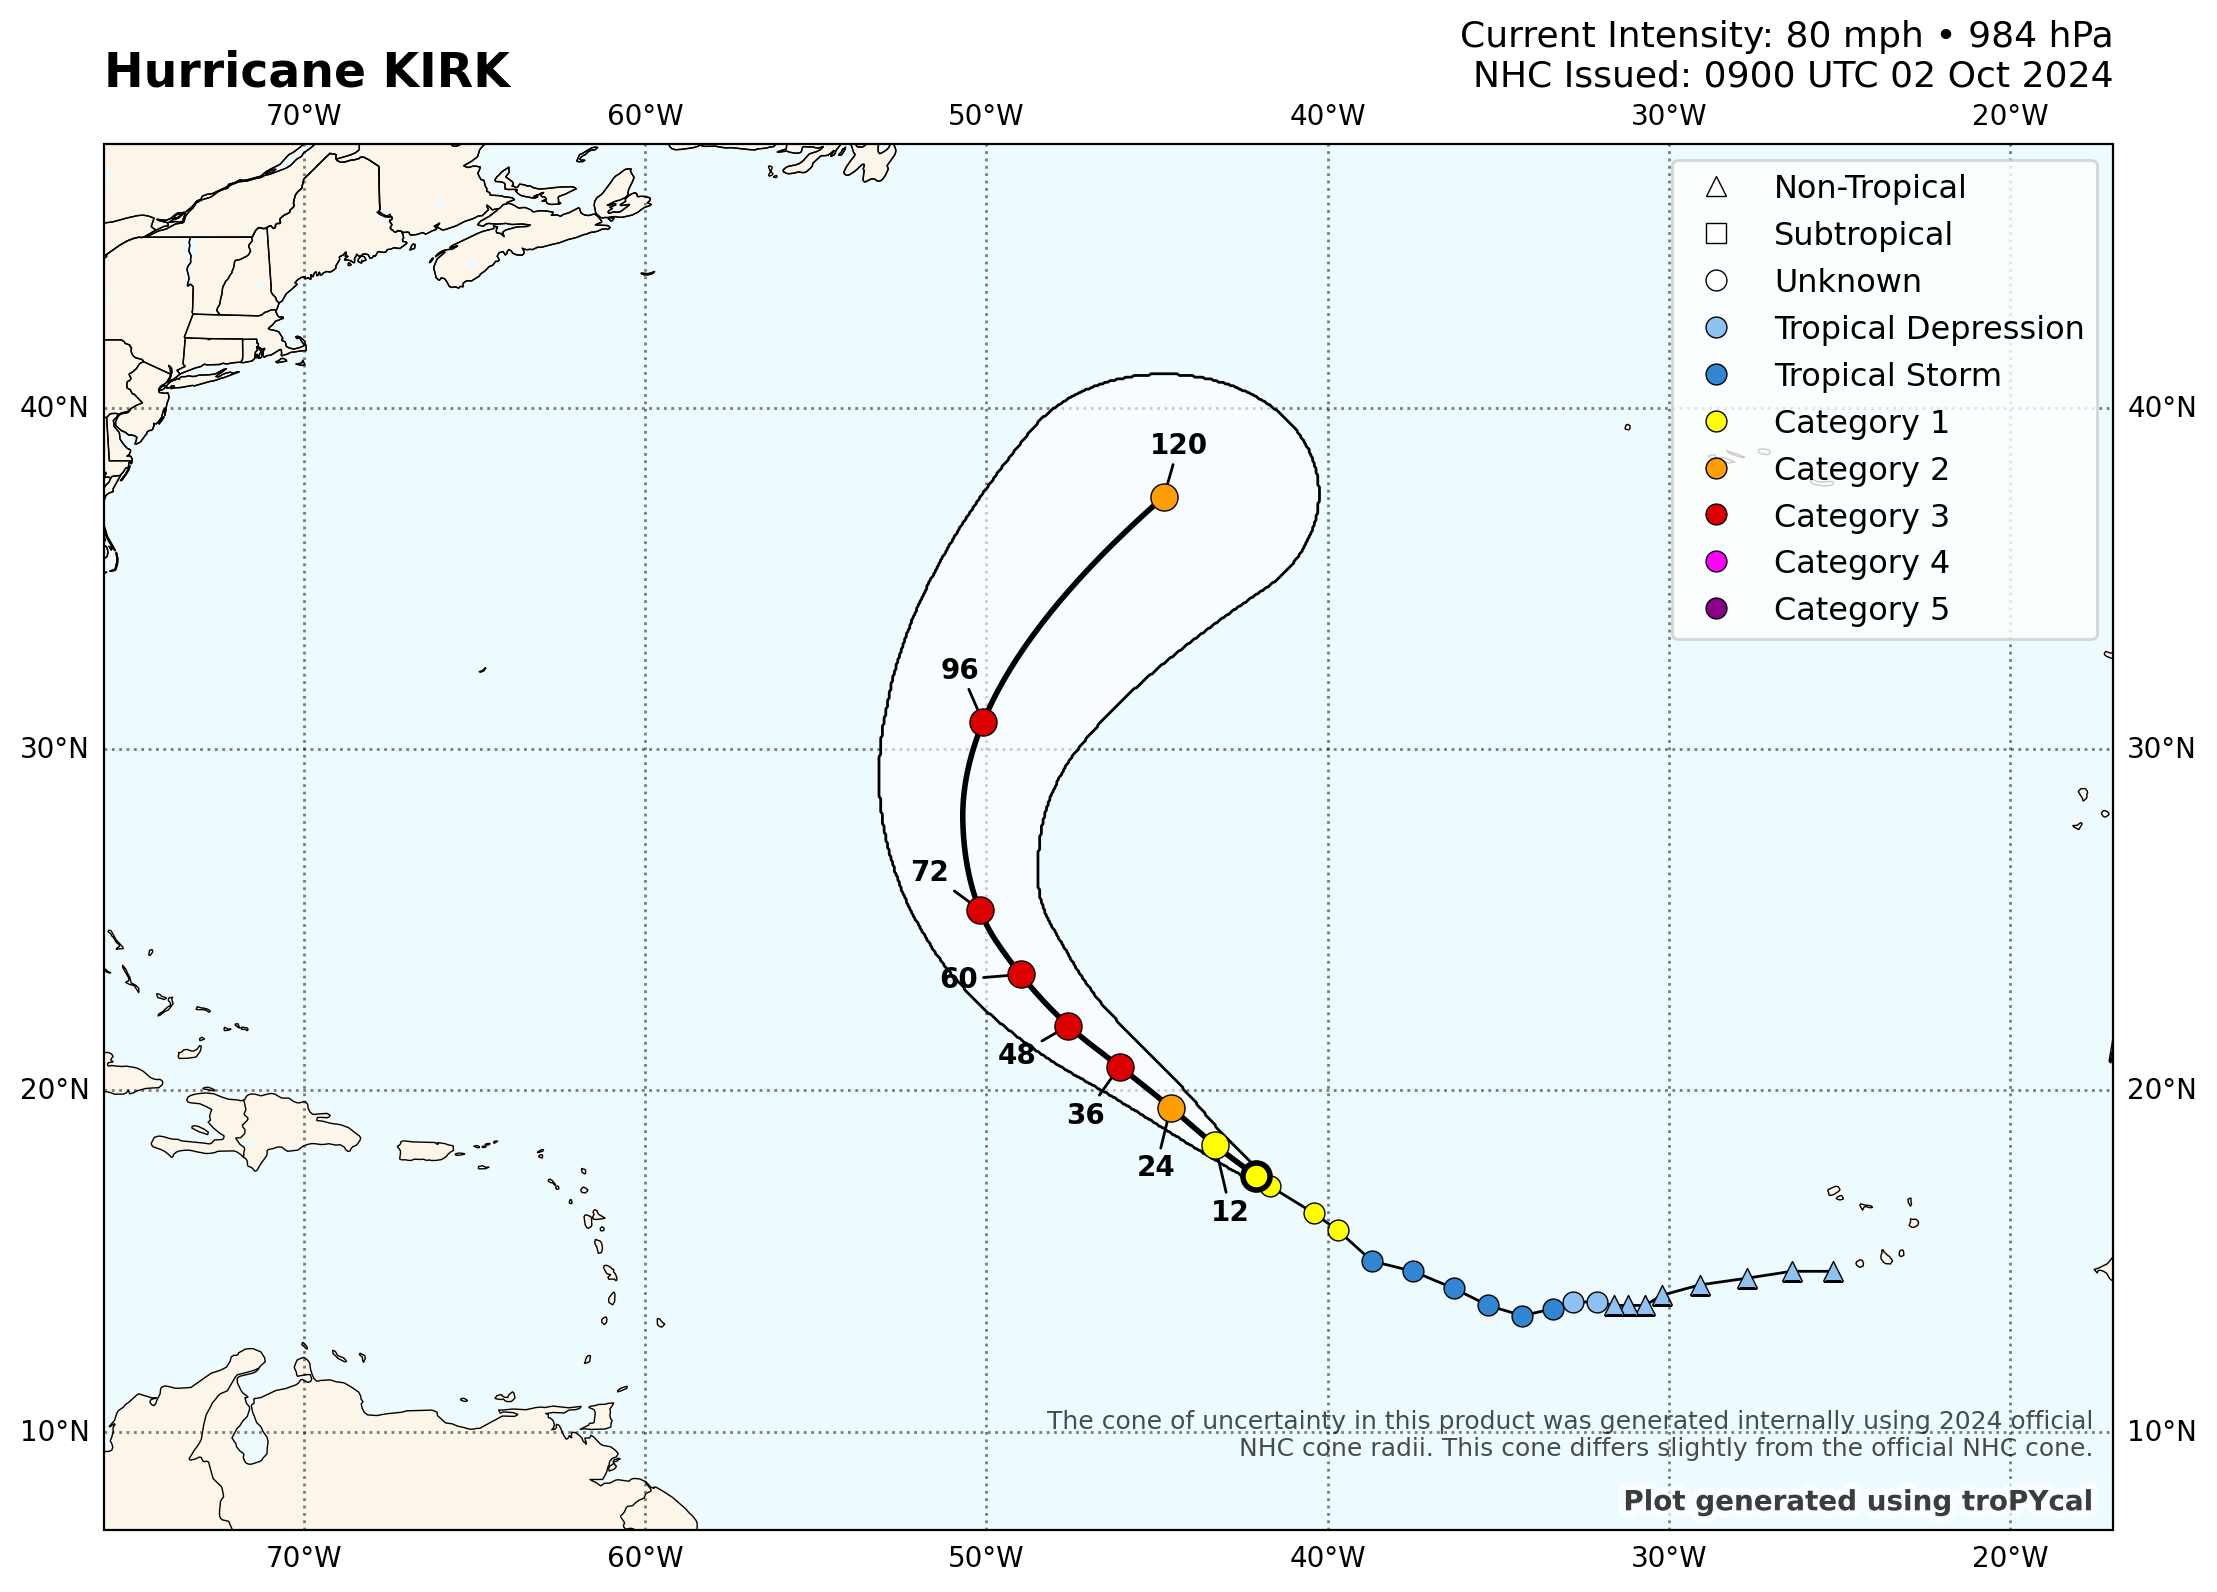

In [35]:
import geojson
# Function to extract exterior ring and storm path for live storms
def extract_storm_geojson(storm):
    # Generate the storm plot forecast
    storm_plot = storm.plot_forecast_realtime(plot=False)

    # Extract exterior rings from the plot
    exterior_rings = []
    storm_path = []
    
    for collection in storm_plot.collections:
        for path in collection.get_paths():
            vertices = path.vertices
            exterior_ring = [(lon, lat) for lon, lat in vertices]
            exterior_rings.append(exterior_ring)

    # Example to extract storm path (line coordinates)
    for line in storm_plot.lines:
        line_coords = line.get_xydata()
        storm_path = [(lon, lat) for lon, lat in line_coords]

    # Create a GeoJSON FeatureCollection for exterior ring
    exterior_features = []
    for ring in exterior_rings:
        if len(ring) > 2:
            polygon = geojson.Polygon([ring])
            feature = geojson.Feature(geometry=polygon, properties={'storm_name': storm.name})
            exterior_features.append(feature)

    # Create a GeoJSON FeatureCollection for the storm path
    path_feature = geojson.Feature(geometry=geojson.LineString(storm_path), properties={'storm_name': storm.name})

    # Combine both into one FeatureCollection
    all_features = geojson.FeatureCollection(exterior_features + [path_feature])

    # Save to GeoJSON
    save_path = f"C:/Downloads/{storm.name}_forecast.geojson"
    with open(save_path, 'w') as f:
        geojson.dump(all_features, f, indent=2)

    print(f"GeoJSON file created for storm '{storm.name}': {save_path}")

# Fetch all live storms
live_storms = realtime_obj.list_active_storms()

# Process each live storm
for storm_name in live_storms:
    storm = realtime_obj.get_storm(storm_name)
    extract_storm_geojson(storm)

In [36]:
# Function to extract storm path (lat/lon) and save as GeoJSON
def extract_storm_path(storm_name):
    storm = realtime_obj.get_storm(storm_name)
    
    # Extract the lon, lat coordinates from the storm object
    coordinates = [(storm.dict['lon'][i], storm.dict['lat'][i]) for i in range(len(storm.dict['lat']))]
    
    # Create GeoJSON features
    features = []
    for lon, lat in coordinates:
        point = geojson.Point((lon, lat))
        feature = geojson.Feature(geometry=point, properties={"storm_name": storm_name})
        features.append(feature)
    
    # Create GeoJSON FeatureCollection
    geojson_data = geojson.FeatureCollection(features)
    
    # Save GeoJSON to file
    save_path = f"C:/Downloads/{storm_name}_path.geojson"
    with open(save_path, 'w') as f:
        geojson.dump(geojson_data, f, indent=2)
    print(f"GeoJSON file for storm '{storm_name}' created: {save_path}")

# Fetch all live storms
live_storms = realtime_obj.list_active_storms()

# Process each live storm
for storm_name in live_storms:
    extract_storm_path(storm_name)

GeoJSON file for storm 'AL122024' created: C:/Downloads/AL122024_path.geojson
GeoJSON file for storm 'AL912024' created: C:/Downloads/AL912024_path.geojson
GeoJSON file for storm 'EP112024' created: C:/Downloads/EP112024_path.geojson
GeoJSON file for storm 'EP972024' created: C:/Downloads/EP972024_path.geojson


In [ ]:
print(storm.dict.keys())

GeoJSON file created for storm 'KIRK': C:/Downloads/north_atlantic_AL122024_KIRK_forecast.geojson


RuntimeError: Error: NHC does not issue advisories for invests that have not been designated as Potential Tropical Cyclones.

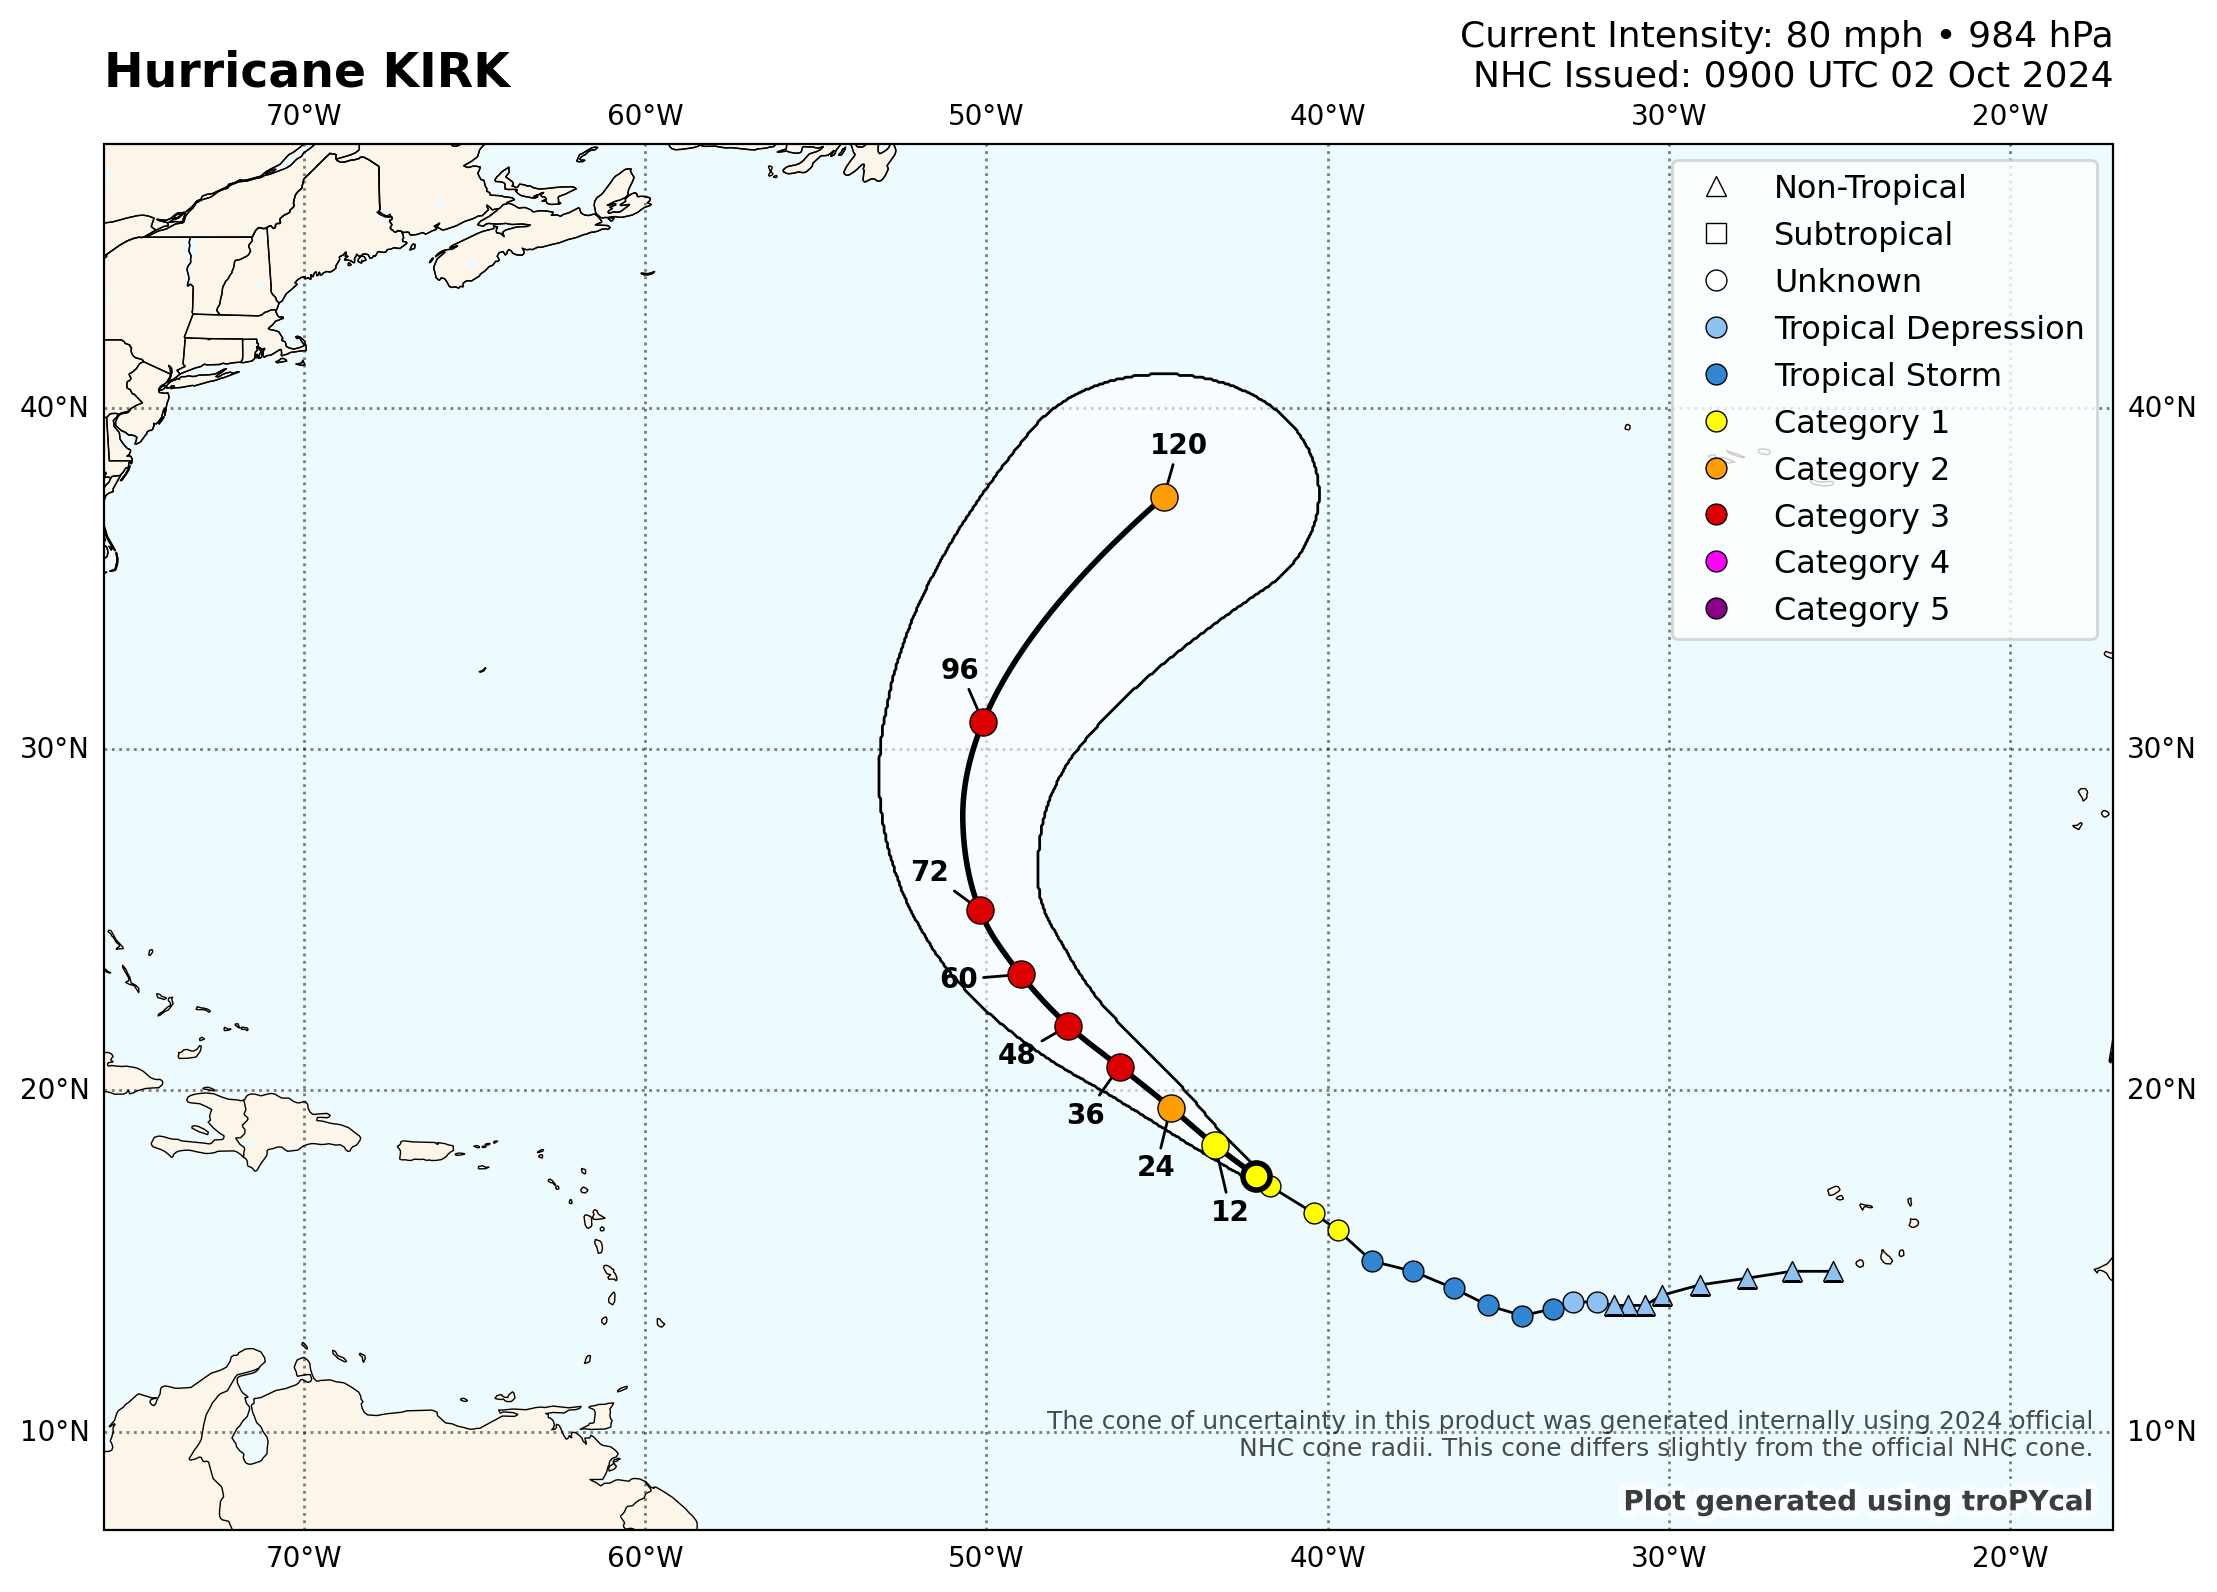

In [33]:
import geojson
import os

# Ensure the save directory exists
save_directory = "C:/Downloads/"
os.makedirs(save_directory, exist_ok=True)

# Function to extract exterior ring and storm path for live storms
def extract_storm_geojson(storm):
    # Generate the storm plot forecast
    storm_plot = storm.plot_forecast_realtime(plot=False)

    # Extract exterior rings from the plot
    exterior_rings = []
    storm_path = []

    # Extract exterior rings from the collections in the storm plot
    for collection in storm_plot.collections:
        for path in collection.get_paths():
            vertices = path.vertices
            exterior_ring = [(lon, lat) for lon, lat in vertices]
            exterior_rings.append(exterior_ring)

    # Extract storm path (line coordinates)
    for line in storm_plot.lines:
        line_coords = line.get_xydata()
        storm_path = [(lon, lat) for lon, lat in line_coords]

    # Create a GeoJSON FeatureCollection for exterior rings
    exterior_features = []
    for ring in exterior_rings:
        if len(ring) > 2:
            polygon = geojson.Polygon([ring])
            feature = geojson.Feature(geometry=polygon, properties={'storm_name': storm.name})
            exterior_features.append(feature)

    # Create a GeoJSON Feature for the storm path
    path_feature = geojson.Feature(geometry=geojson.LineString(storm_path), properties={'storm_name': storm.name})

    # Combine both into one FeatureCollection
    all_features = geojson.FeatureCollection(exterior_features + [path_feature])

    # Get basin and operational ID; handle lists if necessary
    basin = storm.dict['wmo_basin']
    if isinstance(basin, list):
        basin = basin[0]  # Use the first basin if it's a list
    
    operational_id = storm.dict['operational_id']
    if isinstance(operational_id, list):
        operational_id = operational_id[0]  # Use the first operational ID if it's a list

    storm_name = storm.name

    # Create the filename following the 'basin_operationalid_stormname_forecast.geojson' format
    save_path = os.path.join(save_directory, f"{basin}_{operational_id}_{storm_name}_forecast.geojson")

    # Save the GeoJSON file
    with open(save_path, 'w') as f:
        geojson.dump(all_features, f, indent=2)

    print(f"GeoJSON file created for storm '{storm_name}': {save_path}")

# Fetch all live storms
live_storms = realtime_obj.list_active_storms()

# Process each live storm, ignoring invests
for storm_name in live_storms:
    if not storm_name.startswith("INV"):  # Ignore storms starting with "INV" (invests)
        storm = realtime_obj.get_storm(storm_name)
        extract_storm_geojson(storm)


GeoJSON file created for storm 'KIRK': C:/Downloads/north_atlantic_AL122024_KIRK_forecast.geojson
Skipping invest storm: AL912024
GeoJSON file created for storm 'ELEVEN': C:/Downloads/east_pacific_EP112024_ELEVEN_forecast.geojson
Skipping invest storm: EP972024


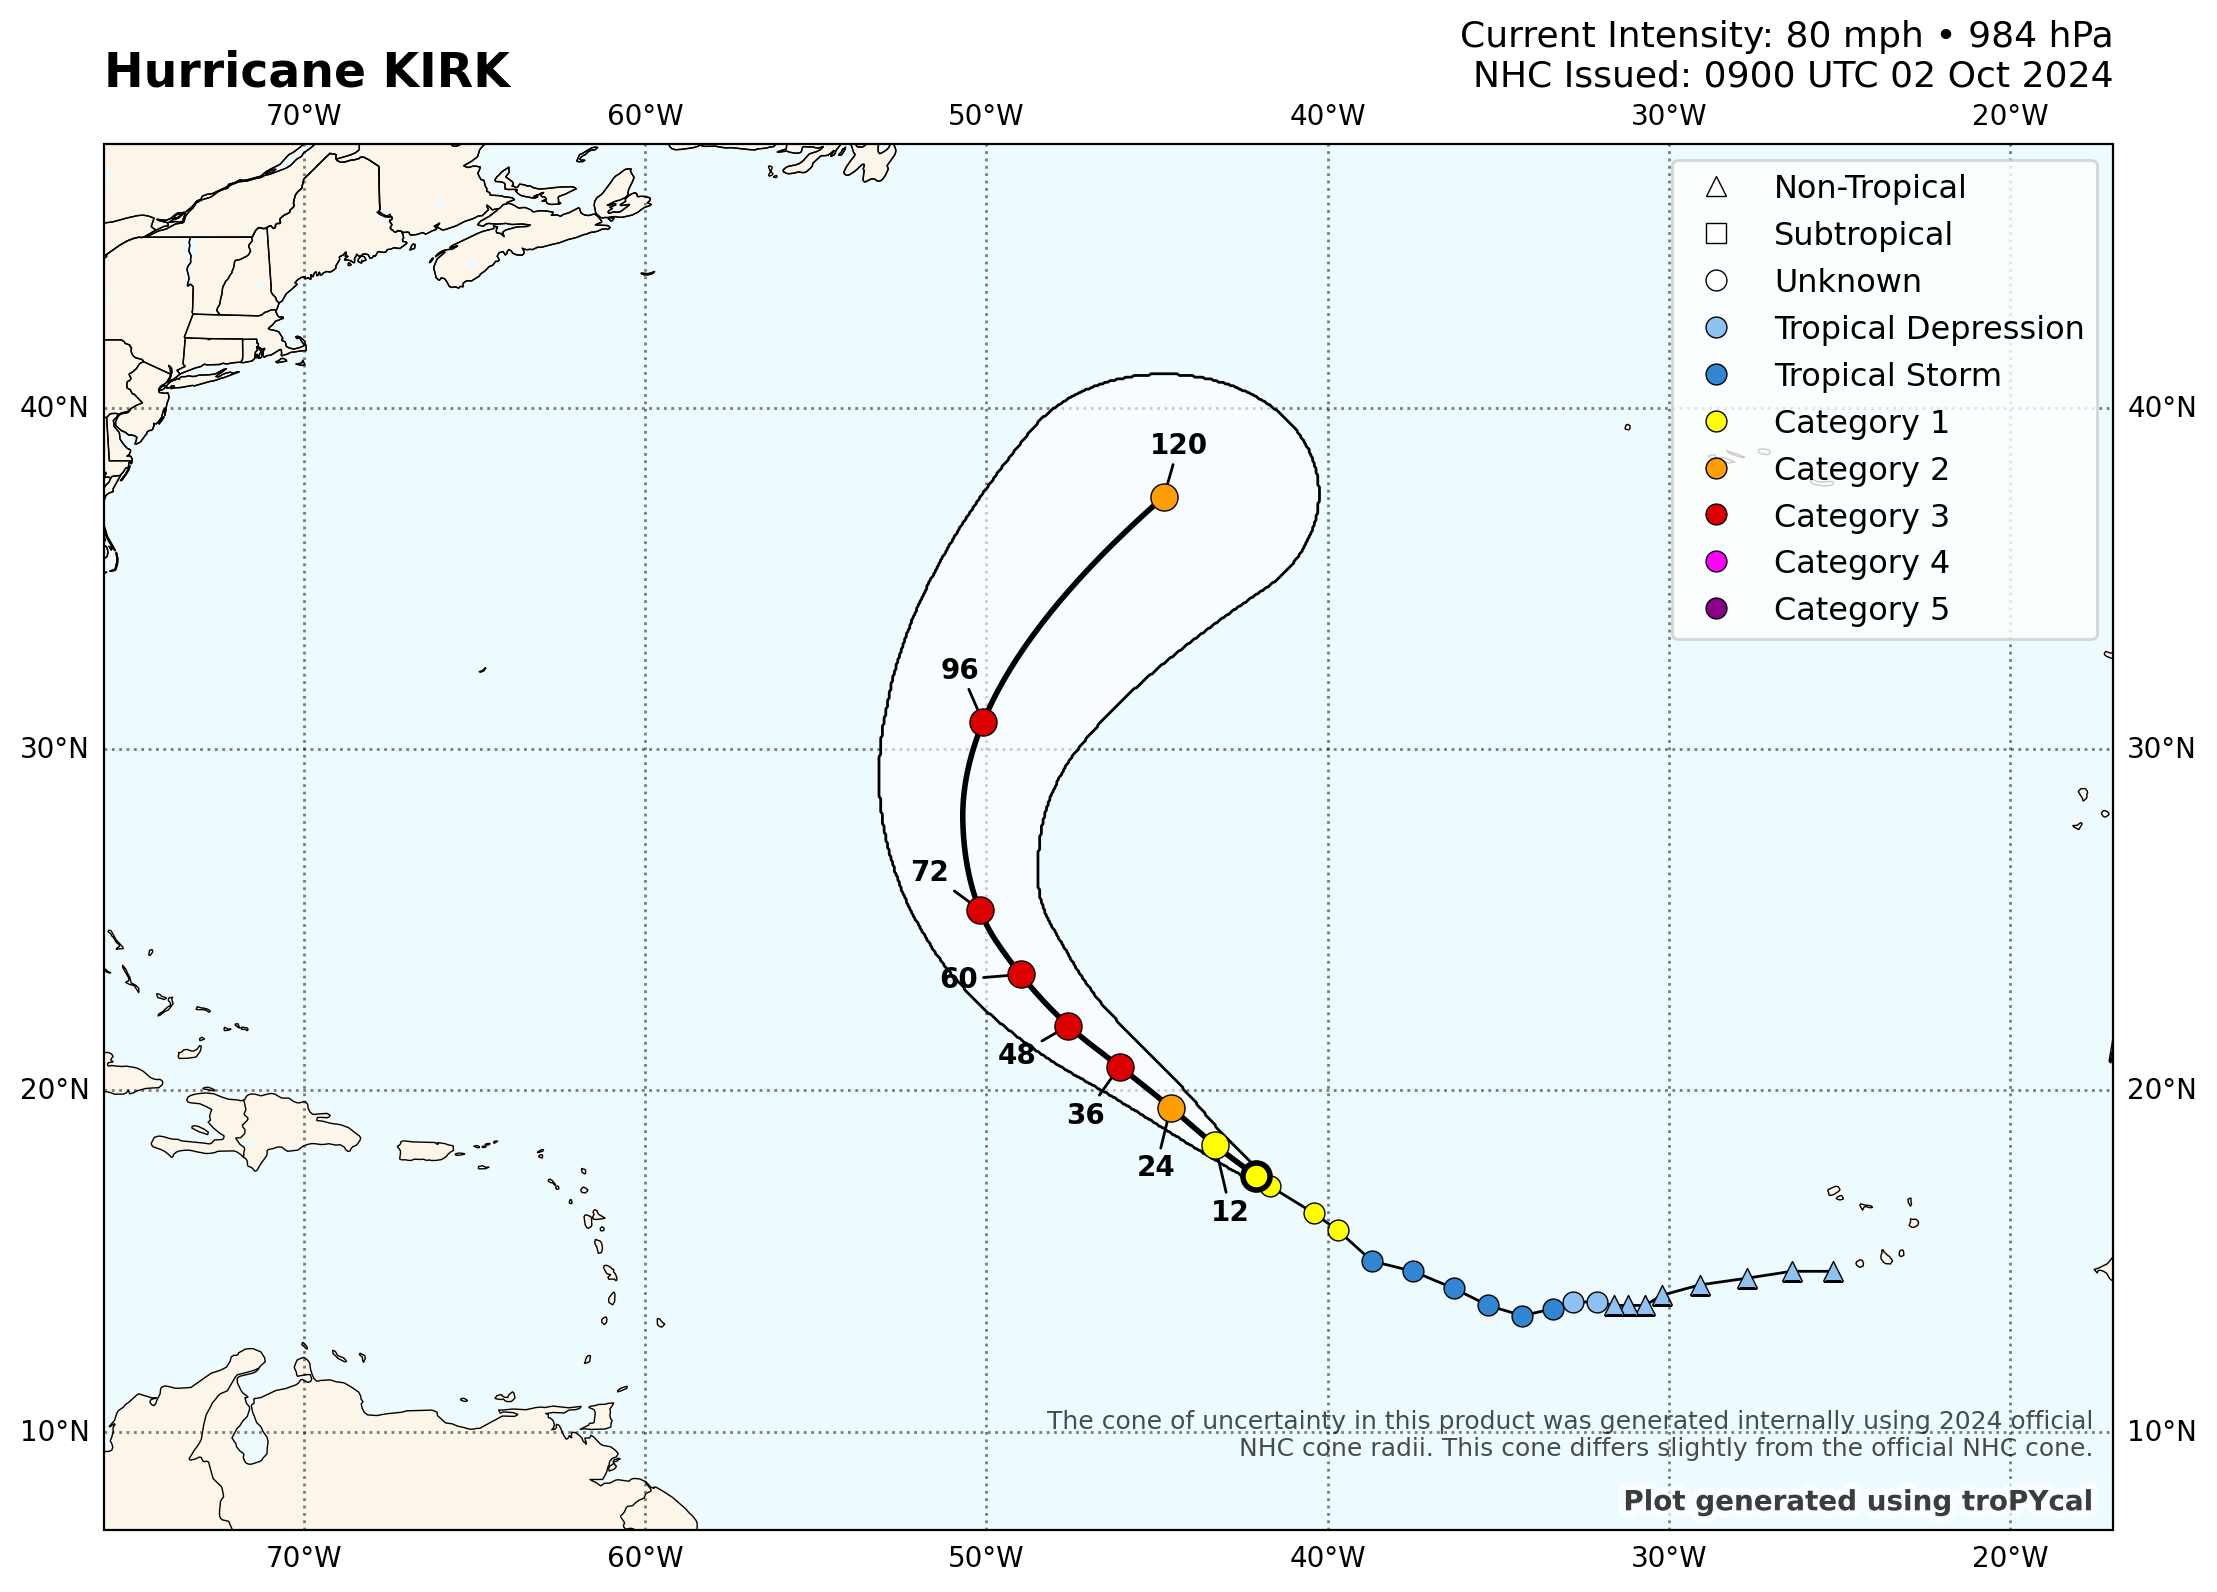

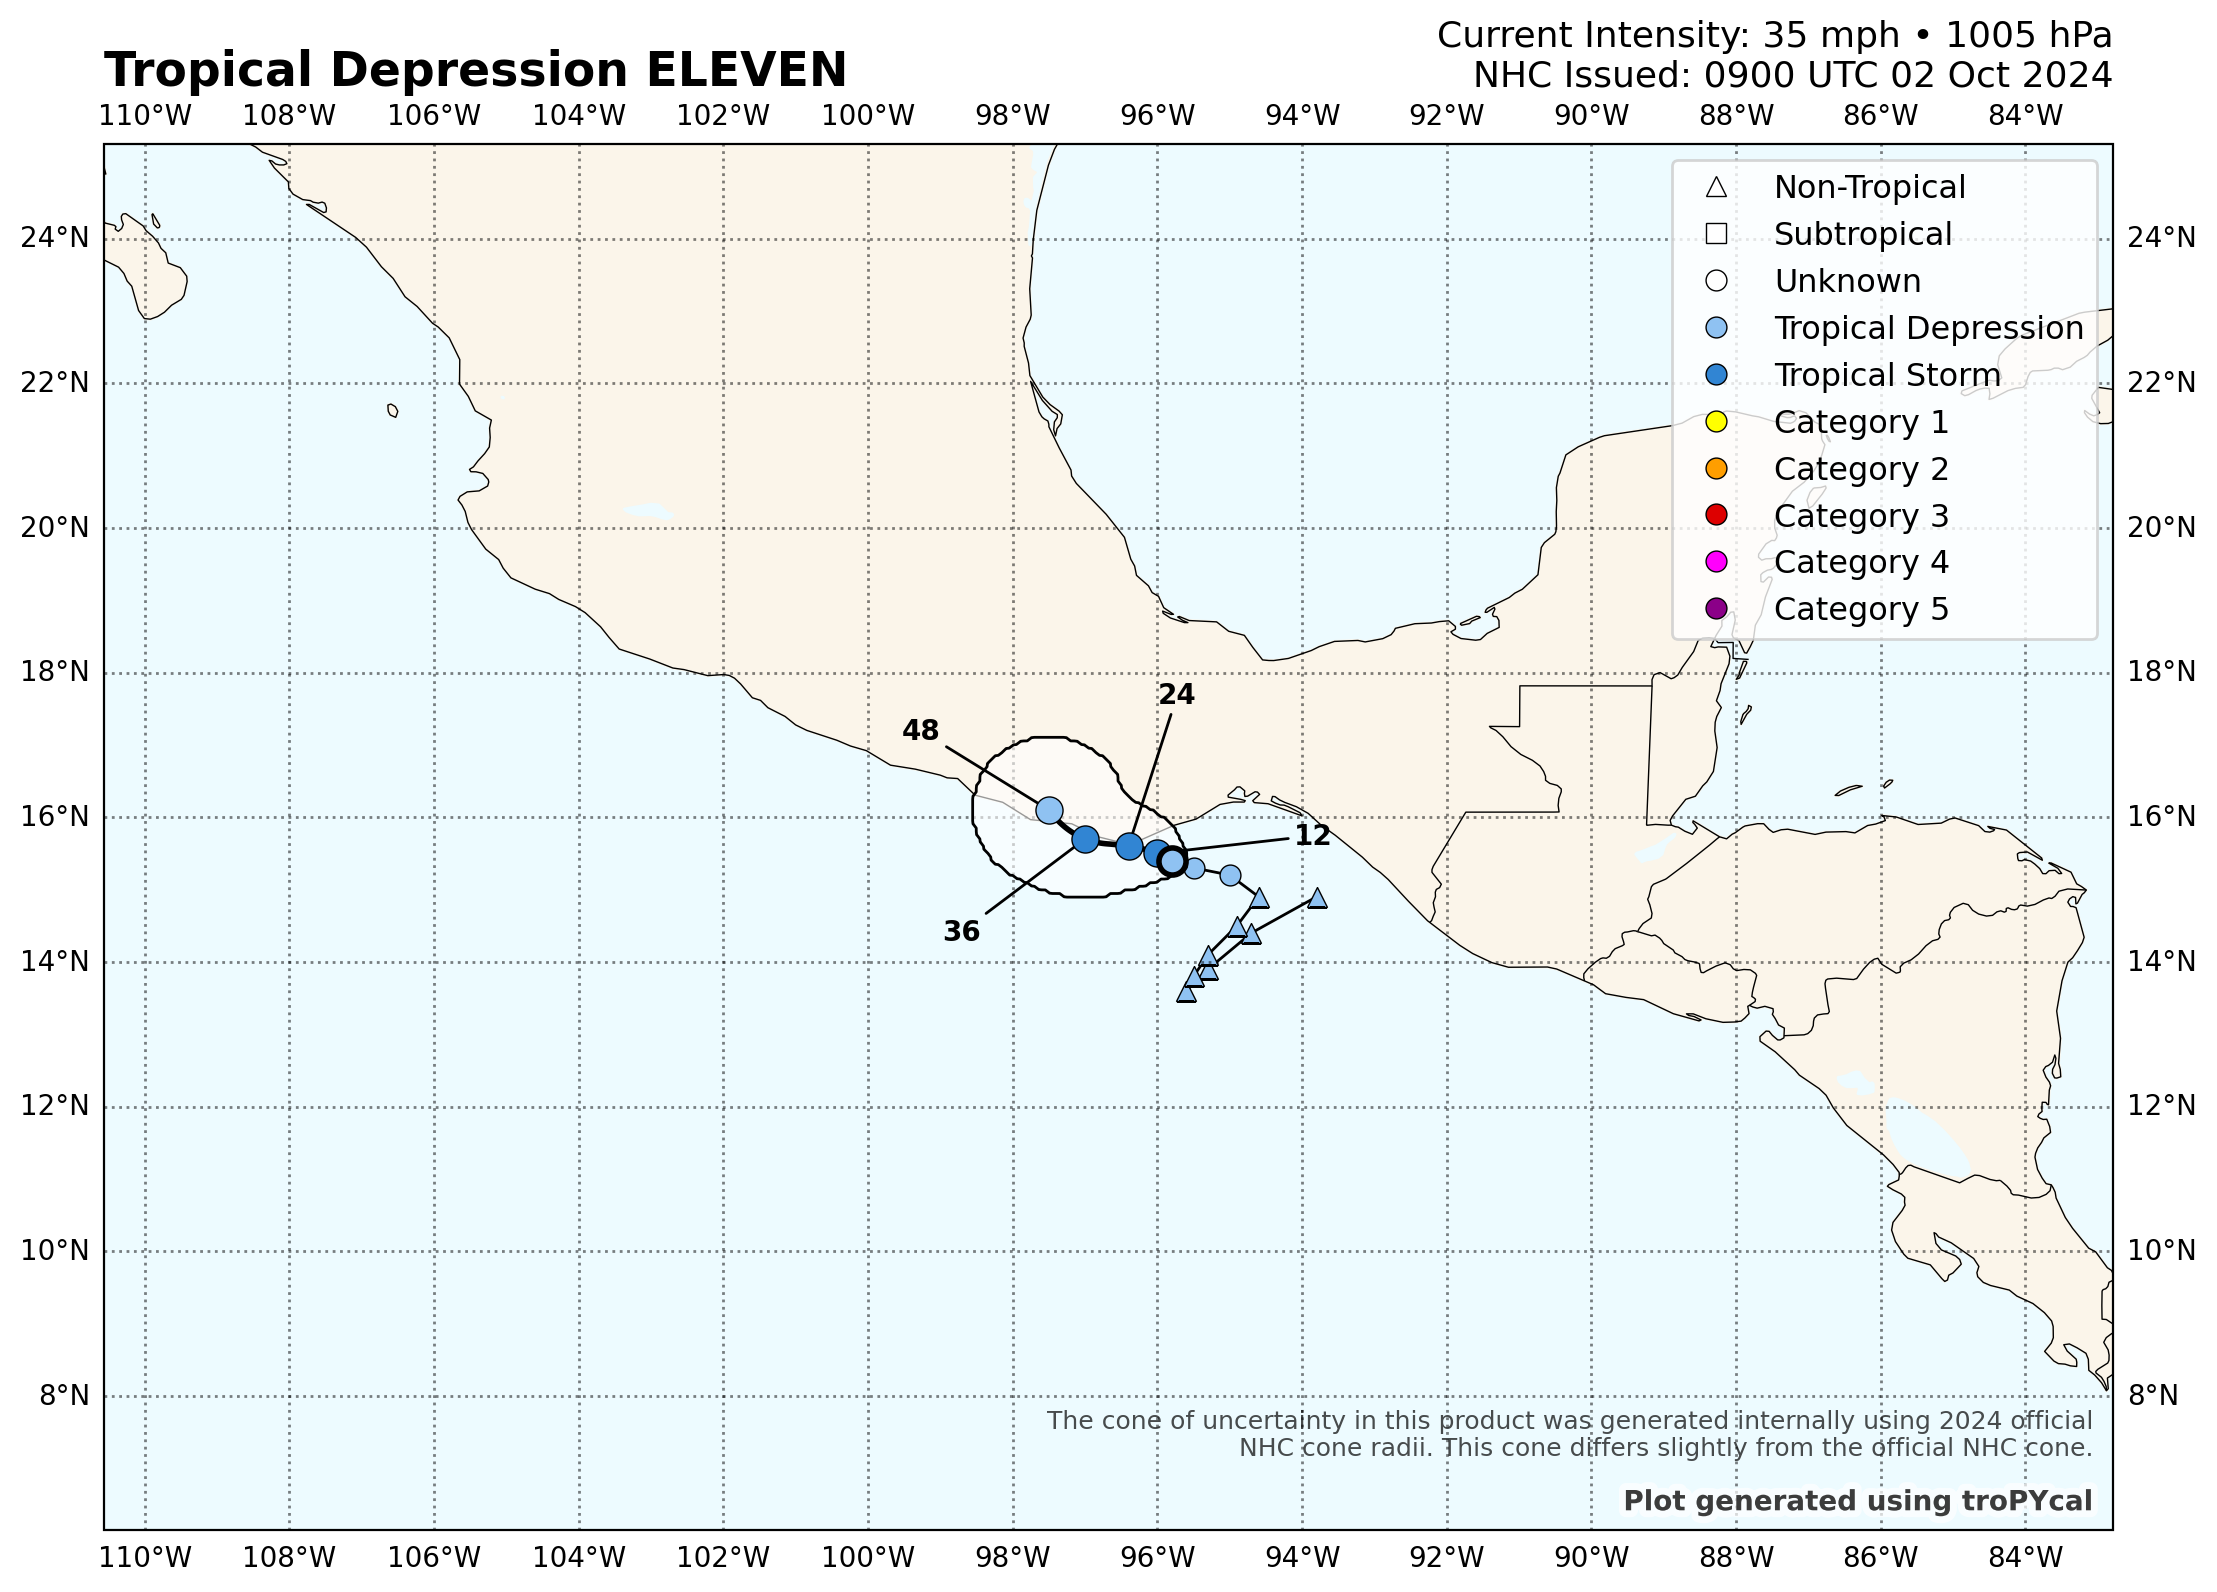

In [44]:
import geojson
import os

# Ensure the save directory exists
save_directory = "C:/Downloads/"
os.makedirs(save_directory, exist_ok=True)

# Function to extract exterior ring and storm path for live storms
def extract_storm_geojson(storm):
    # Generate the storm plot forecast
    storm_plot = storm.plot_forecast_realtime(plot=False)

    # Extract exterior rings from the plot
    exterior_rings = []
    storm_path = []

    # Extract exterior rings from the collections in the storm plot
    for collection in storm_plot.collections:
        for path in collection.get_paths():
            vertices = path.vertices
            exterior_ring = [(lon, lat) for lon, lat in vertices]
            exterior_rings.append(exterior_ring)

    # Extract storm path (line coordinates)
    for line in storm_plot.lines:
        line_coords = line.get_xydata()
        storm_path = [(lon, lat) for lon, lat in line_coords]

    # Create a GeoJSON FeatureCollection for exterior rings
    exterior_features = []
    for ring in exterior_rings:
        if len(ring) > 2:
            polygon = geojson.Polygon([ring])
            feature = geojson.Feature(geometry=polygon, properties={'storm_name': storm.name})
            exterior_features.append(feature)

    # Create a GeoJSON Feature for the storm path
    path_feature = geojson.Feature(geometry=geojson.LineString(storm_path), properties={'storm_name': storm.name})

    # Combine both into one FeatureCollection
    all_features = geojson.FeatureCollection(exterior_features + [path_feature])

    # Get basin and operational ID; handle lists if necessary
    basin = storm.dict['wmo_basin']
    if isinstance(basin, list):
        basin = basin[0]  # Use the first basin if it's a list
    
    operational_id = storm.dict['operational_id']
    if isinstance(operational_id, list):
        operational_id = operational_id[0]  # Use the first operational ID if it's a list

    storm_name = storm.name

    # Create the filename following the 'basin_operationalid_stormname_forecast.geojson' format
    save_path = os.path.join(save_directory, f"{basin}_{operational_id}_{storm_name}_forecast.geojson")

    # Save the GeoJSON file
    with open(save_path, 'w') as f:
        geojson.dump(all_features, f, indent=2)

    print(f"GeoJSON file created for storm '{storm_name}': {save_path}")

# Fetch all live storms
live_storms = realtime_obj.list_active_storms()

# Process each live storm, ignoring invests based on invest status
for storm_name in live_storms:
    storm = realtime_obj.get_storm(storm_name)
    if not storm.dict.get('invest', False):  # Check invest status from storm object
        extract_storm_geojson(storm)
    else:
        print(f"Skipping invest storm: {storm_name}")


In [45]:
import geojson
import os

# Ensure the save directory exists
save_directory = "C:/Downloads/"
os.makedirs(save_directory, exist_ok=True)

# Function to extract storm path (lat/lon) and save as GeoJSON
def extract_storm_path(storm_name):
    storm = realtime_obj.get_storm(storm_name)
    
    # Ignore the storm if it's classified as an invest
    if storm.dict.get('invest', False):
        print(f"Skipping invest storm: {storm_name}")
        return
    
    # Extract the lon, lat coordinates from the storm object
    coordinates = [(storm.dict['lon'][i], storm.dict['lat'][i]) for i in range(len(storm.dict['lat']))]

    # Create GeoJSON features for the storm path
    features = []
    for lon, lat in coordinates:
        point = geojson.Point((lon, lat))
        feature = geojson.Feature(geometry=point, properties={"storm_name": storm_name})
        features.append(feature)

    # Create GeoJSON FeatureCollection for the storm path
    geojson_data = geojson.FeatureCollection(features)

    # Get basin and operational ID
    basin = storm.dict.get('wmo_basin', '')
    if isinstance(basin, list):
        basin = basin[0]  # Use the first basin if it's a list

    operational_id = storm.dict.get('operational_id', '')
    if isinstance(operational_id, list):
        operational_id = operational_id[0]  # Use the first operational ID if it's a list

    # Use the actual storm name instead of repeating operational ID
    storm_name = storm.dict.get('name', '')

    # Create the filename in the format 'basin_operationalid_stormname_path.geojson'
    save_path = os.path.join(save_directory, f"{basin}_{operational_id}_{storm_name}_path.geojson")

    # Save GeoJSON to file
    with open(save_path, 'w') as f:
        geojson.dump(geojson_data, f, indent=2)
    print(f"GeoJSON file for storm '{storm_name}' created: {save_path}")

# Fetch all live storms
live_storms = realtime_obj.list_active_storms()

# Process each live storm, ignoring those that are classified as invests
for storm_name in live_storms:
    extract_storm_path(storm_name)


GeoJSON file for storm 'KIRK' created: C:/Downloads/north_atlantic_AL122024_KIRK_path.geojson
Skipping invest storm: AL912024
GeoJSON file for storm 'ELEVEN' created: C:/Downloads/east_pacific_EP112024_ELEVEN_path.geojson
Skipping invest storm: EP972024


In [ ]:
INSERT INTO storm_forecasts (basin, operational_id, storm_name, forecast_polygon, storm_path)
VALUES (
    'north_atlantic',  -- Basin Name
    'AL122024',        -- Operational ID
    'KIRK',            -- Storm Name
    ST_SetSRID(ST_GeomFromGeoJSON('{"type": "Polygon", "coordinates": [[[-81.5, 27.5], [-80.0, 28.0], [-81.0, 29.0], [-81.5, 27.5]]]}}'), 4326),  -- Forecast Polygon
    ST_SetSRID(ST_GeomFromGeoJSON('{"type": "LineString", "coordinates": [[-81.5, 27.5], [-80.0, 28.0], [-79.5, 29.0]]}}'), 4326)  -- Storm Path
);